In [ ]:
!pip install PyDrive

Download Dataset


In [ ]:
!gdown --id 16Sote3hZODANsQmlZLDj9LM-NUNhSXri

Downloading...
From: https://drive.google.com/uc?id=16Sote3hZODANsQmlZLDj9LM-NUNhSXri
To: /content/mask-dataset.rar
313MB [00:01, 205MB/s]


Cài đặt unrar để giải nén dataset.

In [ ]:
!pip install unrar

In [ ]:
!unrar x /content/mask-dataset.rar

Kết quả truyền trực tuyến bị cắt bớt đến 5000 dòng cuối.
Extracting  mask-dataset/train/without_mask/88.jpg                        16%  OK 
Extracting  mask-dataset/train/without_mask/9.jpg                         16%  OK 
Extracting  mask-dataset/train/without_mask/90.jpg                        16%  OK 
Extracting  mask-dataset/train/without_mask/91.jpg                        16%  OK 
Extracting  mask-dataset/train/without_mask/92.jpg                        16%  OK 
Extracting  mask-dataset/train/without_mask/923666b49a777e3dcc2ca902496e6e5d.jpg      16%  OK 
Extracting  mask-dataset/train/without_mask/94.jpg                        16%  OK 
Extracting  mask-dataset/train/without_mask/95.jpg                        16%  OK 
Extracting  mask-dataset/train/without_mask/96.jpg                        16%  OK 
Extracting  mask-dataset/train/without_mask/97.jpg                        16%  OK 
Extracting 

In [ ]:
# import the necessary packages
from keras.optimizers import RMSprop
from keras.preprocessing.image import ImageDataGenerator
import cv2
from keras.models import Sequential
from keras.layers import Conv2D, Input, ZeroPadding2D, BatchNormalization, Activation, MaxPooling2D, Flatten, Dense,Dropout
from keras.models import Model, load_model
from keras.callbacks import TensorBoard, ModelCheckpoint
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score
from sklearn.utils import shuffle
import imutils
import numpy as np
import matplotlib as pyplot
from google.colab import drive
import os
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
os.chdir("/content/mask-dataset")

In [ ]:
TRAINING_DIR = "./train"
VALIDATION_DIR = "./test"
# Thư mục training with_mask 
train_with_mask_dir = os.path.join(TRAINING_DIR, 'with_mask')

# Thư mục training without_mask
train_without_mask_dir = os.path.join(TRAINING_DIR, 'without_mask')

# Thư mục validation with_mask 
vali_with_mask_dir = os.path.join(VALIDATION_DIR, 'with_mask')

# Thư mục validation without_mask 
vali_without_mask_dir = os.path.join(VALIDATION_DIR, 'without_mask')

Xem 10 phần tử trong tập train (with_mask và without_mask)

In [ ]:
train_with_mask_fnames = os.listdir(train_with_mask_dir)
print(train_with_mask_fnames[:10])

train_without_mask_fnames = os.listdir(train_without_mask_dir)
print(train_without_mask_fnames[:10])

['mask_968.jpg', 'mask_1466.jpg', 'mask_20.jpg', 'mask_56.jpg', 'mask_802.jpg', 'mask_1630.jpg', 'mask_271.jpg', 'mask_964.jpg', 'mask_276.jpg', 'mask_1922.jpg']
['wmask_320.jpg', 'wmask_1394.jpg', 'wwmask_324.jpg', 'wmask_1030.jpg', 'wmask_1170.jpg', 'wmask_462.jpg', 'wmask_1065.jpg', 'wwmask_63.jpg', 'wmask_818.jpg', 'flag-face-painting-for-independence-day.jpeg']


Xem tổng số ảnh trong tập training

In [ ]:
print('Tổng số ảnh train with_mask: ', len(os.listdir(train_with_mask_dir)))
print('Tổng số ảnh train without_mask: ', len(os.listdir(train_without_mask_dir)))
print('Tổng số ảnh validation with_mask: ', len(os.listdir(vali_with_mask_dir)))
print('Tổng số ảnh validation without_mask: ', len(os.listdir(vali_without_mask_dir)))

Tổng số ảnh train with_mask:  2659
Tổng số ảnh train without_mask:  2659
Tổng số ảnh validation with_mask:  598
Tổng số ảnh validation without_mask:  598


Cấu hình tham số matplotlib

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# Parameters for our graph; we'll output images in a 4x4 configuration
nrows = 4
ncols = 4

# Index for iterating over images
pic_index = 0

Một số hình ảnh minh họa

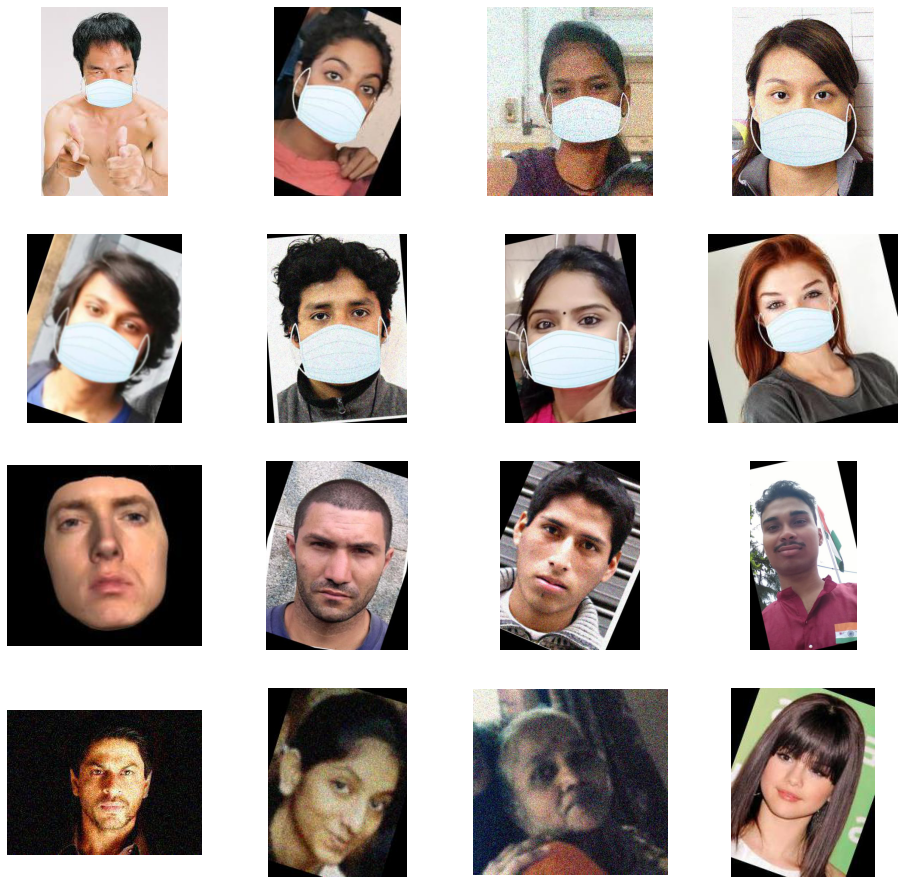

In [ ]:
# Set up matplotlib fig, and size it to fit 4x4 pics
fig = plt.gcf()
fig.set_size_inches(ncols * 4, nrows * 4)

pic_index += 8
next_with_mask_pix = [os.path.join(train_with_mask_dir, fname) 
                for fname in train_with_mask_fnames[pic_index-8:pic_index]]
next_without_mask_pix = [os.path.join(train_without_mask_dir, fname) 
                for fname in train_without_mask_fnames[pic_index-8:pic_index]]

for i, img_path in enumerate(next_with_mask_pix + next_without_mask_pix):
  # Set up subplot; subplot indices start at 1
  sp = plt.subplot(nrows, ncols, i + 1)
  sp.axis('Off') # Don't show axes (or gridlines)

  img = mpimg.imread(img_path)
  plt.imshow(img)

plt.show()

In [ ]:
model =Sequential([
    Conv2D(100, (3,3), activation='relu', input_shape=(150, 150, 3)),
    MaxPooling2D(2,2),
    
    Conv2D(100, (3,3), activation='relu'),
    MaxPooling2D(2,2),
    
    #Conv2D(100, (3,3), activation='sigmoid'),
    #MaxPooling2D(2,2),

    Flatten(),
    Dropout(0.5),
    Dense(50, activation='relu'),
    Dense(2, activation='softmax')
])

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 148, 148, 100)     2800      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 74, 74, 100)       0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 72, 72, 100)       90100     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 36, 36, 100)       0         
_________________________________________________________________
flatten (Flatten)            (None, 129600)            0         
_________________________________________________________________
dropout (Dropout)            (None, 129600)            0         
_________________________________________________________________
dense (Dense)                (None, 50)                6

In [ ]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['acc'])

Tiền xử lý dữ liệu - Data Preprocessing

In [ ]:
# All images will be rescaled by 1./255
train_datagen = ImageDataGenerator(rescale=1.0/255, 
                                   rotation_range=40, 
                                   width_shift_range=0.2, 
                                   height_shift_range=0.2, 
                                   shear_range=0.2, 
                                   zoom_range=0.2, 
                                   horizontal_flip=True, 
                                   fill_mode='nearest')

# Flow training images in batches of 10 using train_datagen generator
train_generator = train_datagen.flow_from_directory(TRAINING_DIR, 
                                                    batch_size=50, 
                                                    target_size=(150, 150))

Found 5318 images belonging to 2 classes.


In [ ]:
# All images will be rescaled by 1./255
validation_datagen = ImageDataGenerator(rescale=1.0/255)

# Flow validation images in batches of 10 using val_datagen generator
validation_generator = validation_datagen.flow_from_directory(VALIDATION_DIR, 
                                                         batch_size=30, 
                                                         target_size=(150, 150))

Found 1196 images belonging to 2 classes.


Training - Tạo model

In [ ]:
checkpoint = ModelCheckpoint('model2-{epoch:03d}.h5',monitor='val_loss',verbose=0,save_best_only=True,mode='auto')
history = model.fit_generator(train_generator,
                              epochs=30,
                              validation_data=validation_generator,
                              callbacks=[checkpoint])

Instructions for updating:
Please use Model.fit, which supports generators.
Epoch 1/30
107/107 [==============================] - 569s 5s/step - loss: 0.5967 - acc: 0.6958 - val_loss: 0.1971 - val_acc: 0.9314
Epoch 2/30
107/107 [==============================] - 567s 5s/step - loss: 0.2954 - acc: 0.8813 - val_loss: 0.1291 - val_acc: 0.9540
Epoch 3/30
107/107 [==============================] - 569s 5s/step - loss: 0.2260 - acc: 0.9165 - val_loss: 0.1253 - val_acc: 0.9498
Epoch 4/30
107/107 [==============================] - 568s 5s/step - loss: 0.1900 - acc: 0.9261 - val_loss: 0.0767 - val_acc: 0.9674
Epoch 5/30
107/107 [==============================] - 557s 5s/step - loss: 0.1728 - acc: 0.9396 - val_loss: 0.1148 - val_acc: 0.9599
Epoch 6/30
107/107 [==============================] - 558s 5s/step - loss: 0.1798 - acc: 0.9338 - val_loss: 0.0531 - val_acc: 0.9791
Epoch 7/30
107/107 [==============================] - 571s 5s/step - loss: 0.1452 - acc: 0.9466 - val_loss: 0.0648 - val_acc: 

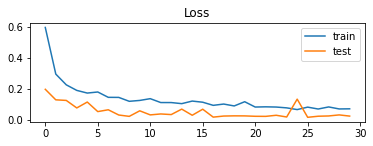

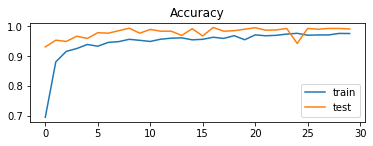

In [ ]:
# plot loss during training
plt.subplot(211)
plt.title('Loss')
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()
plt.show()
# plot accuracy during training
plt.subplot(212)
plt.title('Accuracy')
plt.plot(history.history['acc'], label='train')
plt.plot(history.history['val_acc'], label='test')
plt.legend()
plt.show()